# 一. 回归中的问题     
&emsp;&emsp;回归一词来自一种任务背景，测试孩子与父母身高的关系，如果父母身高比较高，孩子身高也会比较高，但没有父母的平均身高高，更加趋向于人类平均身高，这就是身高回归平均身高的一种现象，称为回归。     

线性回归中，怎么判定训练的模型的好坏呢？因为数据集本身的影响，一般会产生如下两种情况：    
&emsp;&emsp;|-（1）欠拟合     
&emsp;&emsp;|-（2）过拟合     
&emsp;&emsp;      
我们使用下面两个数据集来建立直观判定，哪一种数据集会产生更好的拟合？     
&emsp;&emsp;|- 拟合好坏的判别标准。

### 1. 拟合性问题

##### 1.1. 数据集1

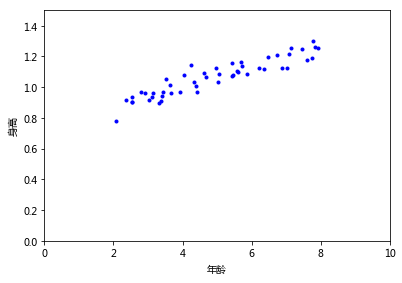

In [13]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x_dat=np.loadtxt('ex2x.dat')
y_dat=np.loadtxt('ex2y.dat')

figure=plt.figure('数据集可视化',figsize=(6,4))
ax=figure.add_axes([0.1,0.1,0.8,0.8],xlabel='年龄',ylabel='身高')
ax.set_xlim(0,10)
ax.set_ylim(0,1.5)
ax.scatter(x_dat,y_dat,label='年龄身高数据集',marker='.',color=(0,0,1,1))
plt.show()

#### 1.2. 数据集2

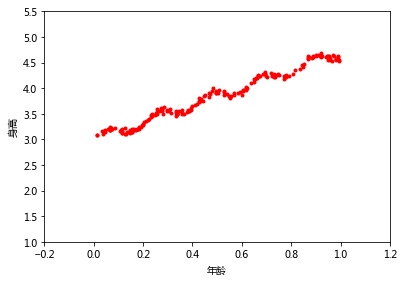

In [28]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# 第一列用来做偏置项1的，真正的数据是第2列与第3列
data=np.loadtxt('ex0.txt')

figure=plt.figure('数据集可视化',figsize=(6,4))
ax=figure.add_axes([0.1,0.1,0.8,0.8],xlabel='年龄',ylabel='身高')
ax.set_xlim(-0.2,1.2)
ax.set_ylim(1,5.5)
ax.scatter(data[:,1],data[:,2],label='不知名数据集',marker='.',color=(1,0,0,1))
plt.show()

##### 1.3. 相关系数    
在数学上提供了一个专门的概念来描述这种数据集的拟合性：相关系数。    
&emsp;&emsp;|-相关系数：用来度量两个向量相关程度的量。     
&emsp;&emsp;      
相关系数的公式定义：      
&emsp;&emsp;|-$r(X,Y)=\dfrac{Cov(X,Y)}{\sqrt{Var(X)Var(Y)}}$        
&emsp;&emsp;其中$Cov(X,Y)$表示$X,Y$的样本协方差（无偏）：$Cov(X)=\dfrac {1} {N-1} \sum \limits _{i=1}^{N} ( X_i - \bar {X} )( Y_i - \bar { Y} ) $       
&emsp;&emsp;其中$Var(X)$表示向量$X$的样本方差（无偏方差）：$Var(X)=\dfrac {1} {N-1} \sum \limits _{i=1}^{N} {( X_i - \bar {X} )}^2$       
&emsp;&emsp;&emsp;&emsp;|-其中$\bar{X}$表示样本均值：$\bar{X}=\dfrac {1} {N} \sum \limits _{i=1}^{N} X_i$

##### 1.4. 练习作业

1. 实现协方差，方差与均值；   
2. 调用numpy中协方差，方差与均值函数；   
3. 对比自己实现的计算结果与numpy的计算结果；   
4. 理解总体方差（有偏）与样本方差（无偏）的区别

##### 1.5.  数据集相关性评估       
下面对上面两个数据集，计算他们的相关系数。     
&emsp;&emsp;|- 计算预测输出值与真实值之间的相关系数，从而可以判定数据集的拟合性好坏。       

1. 数据集1的相关系数计算（sklearn实现）      

0.858063223720823
(50, 1)
(50, 1)
[[1.         0.92631702]
 [0.92631702 1.        ]]


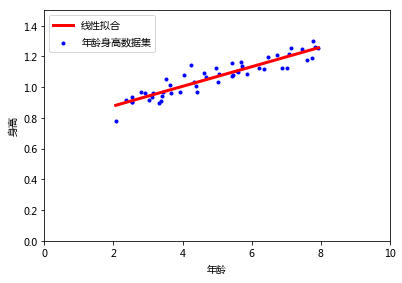

In [3]:
% matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import *
import numpy as np

X_DATA = np.loadtxt('ex2x.dat')
Y_DATA = np.loadtxt('ex2y.dat')
regression=LinearRegression()
X_DATA=X_DATA.reshape(-1, 1)
Y_DATA=Y_DATA.reshape(-1, 1)
regression.fit(X_DATA, Y_DATA)

#  预测输出
Y=regression.predict(X_DATA)
print(regression.score(X_DATA,Y_DATA))
#print(Y)
print(Y.shape)
print(Y_DATA.shape)
# 判定Y_DATA与Y的相关程度

# 必须确保是行向量
cor=np.corrcoef(Y.T,Y_DATA.T)
print(cor)

# 可视化
figure=plt.figure('数据集可视化',figsize=(6,4))
ax=figure.add_axes([0.1,0.1,0.8,0.8],xlabel='年龄',ylabel='身高')
ax.set_xlim(0,10)
ax.set_ylim(0,1.5)
ax.scatter(X_DATA,Y_DATA,label='年龄身高数据集',marker='.',color=(0,0,1,1))

ax.plot(X_DATA,Y,label='线性拟合',color='r',linewidth=3)
ax.legend()

plt.show()

&emsp;&emsp;上面的相关系数的说明：    
&emsp;&emsp;&emsp;&emsp;|-在对角线上是自己与自己的关联系数；       
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;|-对角线上第一个1是$Y$与自己的相关系数；       
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;|-对角线第二个1是$Y\_DATA$与自己的相关系数；     
&emsp;&emsp;&emsp;&emsp;|-反对角线上的两个数是$Y$与$Y\_DATA$、$Y\_DATA$与$Y$的相关性系数。       
&emsp;&emsp;        
&emsp;&emsp;自己与自己的相关系数是最好的，就是1。完全不相关的的就是0，等于协方差完全无关。

2. 数据集2的相关系数计算（sklearn实现）

(200, 1)
(200, 1)
[[1.         0.98647356]
 [0.98647356 1.        ]]


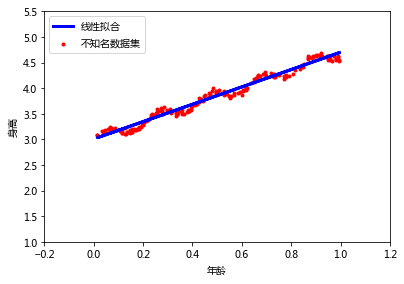

In [23]:
% matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import *
import numpy as np

data=np.loadtxt('ex0.txt')
X_DATA=data[:,1]
Y_DATA=data[:,2]
regression=LinearRegression()
X_DATA=X_DATA.reshape(-1, 1)
Y_DATA=Y_DATA.reshape(-1, 1)
regression.fit(X_DATA, Y_DATA)

#  预测输出
Y=regression.predict(X_DATA)
#print(Y)
print(Y.shape)
print(Y_DATA.shape)
# 判定Y_DATA与Y的相关程度

# 必须确保是行向量
cor=np.corrcoef(Y.T,Y_DATA.T)
print(cor)

# 可视化
figure=plt.figure('数据集可视化',figsize=(6,4))
ax=figure.add_axes([0.1,0.1,0.8,0.8],xlabel='年龄',ylabel='身高')
ax.set_xlim(-0.2,1.2)
ax.set_ylim(1,5.5)
ax.scatter(data[:,1],data[:,2],label='不知名数据集',marker='.',color=(1,0,0,1))
ax.plot(X_DATA,Y,label='线性拟合',color='b',linewidth=3)

ax.legend()
plt.show()

&emsp;&emsp;从上面两个数据集的直观视觉与相关系数都看得出来，数据集2明显具有较好的拟合效果。     
&emsp;&emsp;更好的拟合性表现在数据集样本点尽可能在回归（拟合）直线上。     

3.  **问题**          
&emsp;&emsp;**能否有好的方式提高数据的拟合性？**这就可以解决样本欠拟合的问题。    

### 2. 矩阵奇异的问题   

&emsp;&emsp;在线性回归中，最小二乘法（OLS：Ordinary Least Squares）依赖一个条件$X^TX$是可逆的。有一种情况下$X^TX$很容易不可逆的（奇异矩阵），就是特征比样本还多的时候。       
&emsp;&emsp;怎么确保矩阵（其实是方阵）$X^TX$ 是可逆的，从而解决计算问题？        

### 3. 多类分类的问题

&emsp;&emsp;多类分类问题，实际上有一个直观的解决办法，把多类分类转换成多个二类分类问题，每个类一个分类器，用来分开样本与其他样本。这种分类器的理论依据在哪儿?是否还有其他多类分类设计，以及其理论依据在哪儿？          

### 4.  回归三大问题的解决


&emsp;&emsp;上述三大问题，我们在下面分别解决：   

# 二、局部加权回归    
&emsp;&emsp;局部加权回归（Locally Weighted Linear Regression：LWLR）      
&emsp;&emsp;局部加权回归是解决线性回归欠拟合问题二提出的。   
&emsp;&emsp;解决问题的出发点是：线性回归的最终核心是使均方差函数最小（最小均方误差），局部加权是引入加权的方式，降低均方误差，使得拟合性的度量结果更好。    
&emsp;&emsp;因为线性拟合中的均方差是无偏的，适当引入一些偏差，可以有效降低均方差。     

### 1. 局部加权模型
&emsp;&emsp;$W=(X^T\bar{W}X)^{-1}X^T\bar{W}y$     
&emsp;&emsp;其中$\bar{W}$就是局部加权系数。       
&emsp;&emsp;      
&emsp;&emsp;其中加权系数的确定是一个麻烦的事情，该系数必须确保，预测样本点离已知样本越远加权系数越小，预测样本点离已知样本越近加权系数越大。如果大家还记得正态分布（高斯分布）函数的性质，如果在0点取值1，在接近无穷远点，取值0。我们就利用正态分布这个特性，可以取$\bar{W}$，其其他位置的元素都为0，对角线上的值为：     
&emsp;&emsp;$\bar{W}(i,i)=exp(\dfrac{(x^{(i)}-x)^2}{-2{\sigma}^2})$       
&emsp;&emsp;矩阵形式是：    
&emsp;&emsp;$\bar{W}(i,i)=exp(\dfrac{(x^{(i)}-x)(x^{(i)}-x)^T}{-2{\sigma}^2})$     
&emsp;&emsp;下面使用图示的方式，来理解该系数在回归训练中控制训练样本参与训练的作用与价值。     

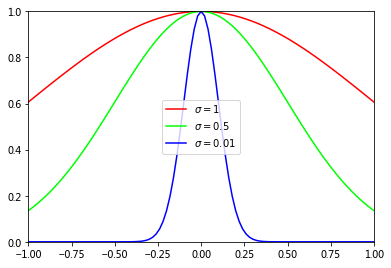

In [34]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


# 图形数据
sigma=1
x_0=0
x=np.linspace(-1,1,101,dtype=np.float32)
y_1=np.exp((x_0-x)**2/(-2.0*sigma*sigma))
sigma=0.5
y_05=np.exp((x_0-x)**2/(-2.0*sigma*sigma))
sigma=0.1
y_001=np.exp((x_0-x)**2/(-2.0*sigma*sigma))

# 坐标轴
figure=plt.figure('机器学习-回归优化',figsize=(6,4))
ax=figure.add_axes([0.1,0.1,0.8,0.8],label='高斯分布系数权重关系')
ax.set_xlim(-1,1)
ax.set_ylim(0,1)
# 图形绘制
ax.plot(x,y_1,color=(1,0,0,1),label='$\sigma=1$')
ax.plot(x,y_05,color=(0,1,0,1),label='$\sigma=0.5$')
ax.plot(x,y_001,color=(0,0,1,1),label='$\sigma=0.01$')
ax.legend()
plt.show()


### 2. 局部加权线性回归的数学基础

- 备注
    - $J(W) = \dfrac{1}{2} \sum \limits _{i=1} ^ m (x_iW - y_i)^2$
    - $J(W) = \dfrac{1}{2} \sum \limits _{i=1} ^ m p_i(x_iW - y_i)^2$

&emsp;&emsp;局部加权线性回归的数学基础从损失函数开始谈起；     
&emsp;&emsp;正如我们上面分析的，加权的目的是使得均方差最小，换句话说就是使得损失函数最小，这样我们就可以得到局部加权线性回归的损失函数表示：        
&emsp;&emsp;&emsp;&emsp;$J(W)=\dfrac{1}{2}\sum\limits_{i=1}^{m}w^{(i)}(x^{(i)}W-y^{(i)})^2$       
&emsp;&emsp;&emsp;&emsp;其中$w^{(i)}=exp(\dfrac{(x^{(i)}-x)^2}{-2{\sigma}^2})$
&emsp;&emsp;&emsp;&emsp;      
&emsp;&emsp;&emsp;&emsp;如果采用最下二乘法推导损失函数的最小值，可以得到最终的W计算公式：    
&emsp;&emsp;&emsp;&emsp;$W=(X^T\bar{W}X)^{-1}X^T\bar{W}y$     

- 怎么设计$p_i$使得$(xW-y)$越大，$p_i$越小。 :正态分布满足这个特性。

### 3. 局部加权实现    
&emsp;&emsp;因为是总体拟合性考虑，所以每个测试样本对总体训练样本都有一个加权矩阵，该测试样本根据加权矩阵计算出对应的预测值。这样预测值总体的拟合性就会更好点。     

1. 结构设计

In [57]:

import matplotlib.pyplot as plt
import numpy as np

# 求一个样本的局部权重预测值（下面函数按照多维模式，但只考虑1维情况）
class  LWLinearRegression:
    def __init__(self, sample_x, label_y, sigma=1.0):
        self.X=sample_x
        self.Y=label_y
    
    def train_one_sample(self, data):
        # data 测试样本
        # 数据加权预测值
        # 数据格式化
        # 1. 计算局部加权矩阵
        # 2. 计算线性回归系数矩阵
        # 3.计算预测值
        return [0.0]
        
    def train(self, datasets):
        Y=np.zeros(shape=(datasets.shape[0],1), dtype=np.float)
        # 循环计算预测值
        for idx in range(datasets.shape[0]):
            Y[idx]=self.train_one_sample(datasets[idx])
        return Y

# 数据初始化
data=np.loadtxt('ex0.txt')
X_DATA=data[:,1]
Y_DATA=data[:,2]
# 数据格式化
X=np.zeros(shape=(X_DATA.shape[0], 2), dtype=np.float) # 考虑偏置项，在测试特征加一维
Y=Y_DATA.reshape(Y_DATA.shape[0], 1)
X[:, 0]=X_DATA
X[:, 1]=1

lwlr=LWLinearRegression(X, Y)
predict=lwlr.train(X)
#print(predict)

2. 实现

In [72]:
import matplotlib.pyplot as plt
import numpy as np

# 求一个样本的局部权重预测值（下面函数按照多维模式，但只考虑1维情况）
class  LWLinearRegression:
    def __init__(self, sample_x, label_y, sigma=1.0):
        self.X=sample_x
        self.Y=label_y
        self.sigma=sigma
    
    def train_one_sample(self, data):
        # data 测试样本
        # 数据加权预测值
        # 数据格式化
        # 1. 计算局部加权矩阵
        local_weight=np.zeros(shape=(self.X.shape[0],self.X.shape[0]),dtype=np.float32)
        for idx in range(local_weight.shape[0]):
            # 求差
            diff=data-self.X[idx,:]
            # 求平方,然后除以sigma
            sqrt=np.matmul(diff,diff.T)/(-2.0*(self.sigma**2))
            # 计算局部加权矩阵的对角线
            local_weight[idx,idx]=np.exp(sqrt)
        # 2. 计算线性回归系数矩阵
        # 这里应该先做一个奇异值判定（我们暂时不去判定，等系统处理发生的异常）
        W=np.matmul(
                np.matmul(
                    np.matmul(
                        np.linalg.inv(
                            np.matmul(
                                np.matmul(
                                    self.X.T,
                                    local_weight
                                ),
                                self.X
                            )
                        ),
                        self.X.T
                    ),
                    local_weight
                ),
                self.Y
            )
        # 3.计算预测值
        out_value=np.matmul(data,W)
        return out_value
        
    def train(self, datasets):
        Y=np.zeros(shape=(datasets.shape[0],1), dtype=np.float)
        # 循环计算预测值
        for idx in range(datasets.shape[0]):
            Y[idx]=self.train_one_sample(datasets[idx])
        return Y

# 数据初始化
data=np.loadtxt('ex0.txt')
X_DATA=data[:,1]
Y_DATA=data[:,2]
# 数据格式化
X=np.zeros(shape=(X_DATA.shape[0], 2), dtype=np.float) # 考虑偏置项，在测试特征加一维
Y=Y_DATA.reshape(Y_DATA.shape[0], 1)
X[:, 0]=X_DATA
X[:, 1]=1

lwlr=LWLinearRegression(X, Y)
# 使用训练集作为测试集
predict=lwlr.train(X)
#print(predict) 

3. 拟合可视化        
&emsp;&emsp;通过可视化来观察拟合效果；为了保证代码的完整性，我们把计算于可视化代码放在一起。      

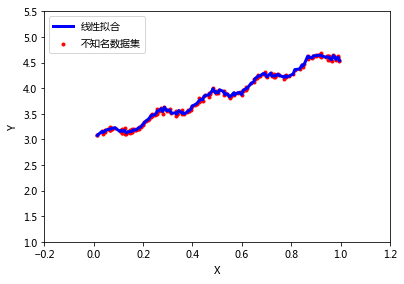

In [34]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# 求一个样本的局部权重预测值（下面函数按照多维模式，但只考虑1维情况）
class  LWLinearRegression:
    def __init__(self, sample_x, label_y, sigma=1.0):
        self.X=sample_x
        self.Y=label_y
        self.sigma=sigma
    
    def train_one_sample(self, data):
        # data 测试样本
        # 数据加权预测值
        # 数据格式化
        # 1. 计算局部加权矩阵
        local_weight=np.zeros(shape=(self.X.shape[0],self.X.shape[0]),dtype=np.float32)
        for idx in range(local_weight.shape[0]):
            # 求差
            diff=data-self.X[idx,:]
            # 求平方,然后除以sigma
            sqrt=np.matmul(diff,diff.T)/(-2.0*(self.sigma**2))
            # 计算局部加权矩阵的对角线
            local_weight[idx,idx]=np.exp(sqrt)
        # 2. 计算线性回归系数矩阵
        # 这里应该先做一个奇异值判定（我们暂时不去判定，等系统处理发生的异常）
        W=np.matmul(
                np.matmul(
                    np.matmul(
                        np.linalg.inv(
                            np.matmul(
                                np.matmul(
                                    self.X.T,
                                    local_weight
                                ),
                                self.X
                            )
                        ),
                        self.X.T
                    ),
                    local_weight
                ),
                self.Y
            )
        # 3.计算预测值
        out_value=np.matmul(data,W)
        return out_value
        
    def train(self, datasets):
        Y=np.zeros(shape=(datasets.shape[0],1), dtype=np.float)
        # 循环计算预测值
        for idx in range(datasets.shape[0]):
            Y[idx]=self.train_one_sample(datasets[idx])
        return Y

# 数据初始化
data=np.loadtxt('ex0.txt')
X_DATA=data[:,1]
Y_DATA=data[:,2]
# 数据格式化
X=np.zeros(shape=(X_DATA.shape[0], 2), dtype=np.float) # 考虑偏置项，在测试特征加一维
Y=Y_DATA.reshape(Y_DATA.shape[0], 1)
X[:, 0]=X_DATA
X[:, 1]=1

sigma=0.003
lwlr=LWLinearRegression(X, Y,sigma)
# 使用训练集作为测试集
predict=lwlr.train(X)
#print(predict) 

# 可视化
figure=plt.figure('数据集可视化',figsize=(6,4))
ax=figure.add_axes([0.1,0.1,0.8,0.8],xlabel='X',ylabel='Y')
ax.set_xlim(-0.2,1.2)
ax.set_ylim(1,5.5)
ax.scatter(X_DATA,Y_DATA,label='不知名数据集',marker='.',color=(1,0,0,1))

# 排序显示
# 得到排序索引
sort_idx=X_DATA.argsort(0)
# 得到排序的结果
X_SORT=X_DATA[sort_idx]
Y_SORT=predict[sort_idx]
ax.plot(X_SORT,Y_SORT,label='线性拟合',color='b',linewidth=3)

ax.legend()
plt.show()

4.  拟合度量计算     
&emsp;&emsp;通过相关系数，来判定拟合的效果；   

In [82]:
import matplotlib.pyplot as plt
import numpy as np

# 求一个样本的局部权重预测值（下面函数按照多维模式，但只考虑1维情况）
class  LWLinearRegression:
    def __init__(self, sample_x, label_y, sigma=1.0):
        self.X=sample_x
        self.Y=label_y
        self.sigma=sigma
    
    def train_one_sample(self, data):
        # data 测试样本
        # 数据加权预测值
        # 数据格式化
        # 1. 计算局部加权矩阵
        local_weight=np.zeros(shape=(self.X.shape[0],self.X.shape[0]),dtype=np.float32)
        for idx in range(local_weight.shape[0]):
            # 求差
            diff=data-self.X[idx,:]
            # 求平方,然后除以sigma
            sqrt=np.matmul(diff,diff.T)/(-2.0*(self.sigma**2))
            # 计算局部加权矩阵的对角线
            local_weight[idx,idx]=np.exp(sqrt)
        # 2. 计算线性回归系数矩阵
        # 这里应该先做一个奇异值判定（我们暂时不去判定，等系统处理发生的异常）
        W=np.matmul(
                np.matmul(
                    np.matmul(
                        np.linalg.inv(
                            np.matmul(
                                np.matmul(
                                    self.X.T,
                                    local_weight
                                ),
                                self.X
                            )
                        ),
                        self.X.T
                    ),
                    local_weight
                ),
                self.Y
            )
        # 3.计算预测值
        out_value=np.matmul(data,W)
        return out_value
        
    def train(self, datasets):
        Y=np.zeros(shape=(datasets.shape[0],1), dtype=np.float)
        # 循环计算预测值
        for idx in range(datasets.shape[0]):
            Y[idx]=self.train_one_sample(datasets[idx])
        return Y

# 数据初始化
data=np.loadtxt('ex0.txt')
X_DATA=data[:,1]
Y_DATA=data[:,2]
# 数据格式化
X=np.zeros(shape=(X_DATA.shape[0], 2), dtype=np.float) # 考虑偏置项，在测试特征加一维
Y=Y_DATA.reshape(Y_DATA.shape[0], 1)
X[:, 0]=X_DATA
X[:, 1]=1

sigma=0.003
lwlr=LWLinearRegression(X, Y,sigma)
# 使用训练集作为测试集
predict=lwlr.train(X)
#print(predict) 

cor=np.corrcoef(predict.T,Y.T)
print(cor)

[[1.         0.99931945]
 [0.99931945 1.        ]]


&emsp;&emsp;从相关系数来看，拟合的效果应该是非常的好了！

# 三、回归正则化

### 1. Ridge回归 

&emsp;&emsp;如果在上面的线性回归中，调整sigma参数，很容易出现矩阵奇异。为了解决矩阵奇异，在局部加权基础上，对局部系数调整，使得矩阵不发生奇异。     
&emsp;&emsp;系数调整方式是：     
&emsp;&emsp;$W=(X^TX+\lambda I)^{-1}X^TY$     
&emsp;&emsp;     
&emsp;&emsp;因为单位矩阵形象的称呼为岭回归。 

##### 1.1 奇异值分解       

&emsp;&emsp;假设$M$是一个$m×n$阶矩阵，其中的元素全部属于实数域$R$或复数域$C$。则$M$存在一个分解使得：       
 &emsp;&emsp;$M=U \Sigma V^H$       
&emsp;&emsp;其中$U$是$m×m$阶酉矩阵；$\Sigma$是半正定$m×n$阶对角矩阵；而$V^H$，即$V$的共轭转置，是$n×n$阶酉矩阵。$\Sigma$对角线上的元素$\lambda _{i}$，其中$\lambda _{i}$即为$M$的奇异值。      
&emsp;&emsp;这样的分解就称作$M$的奇异值分解。      
&emsp;&emsp;如果奇异值由大而小排列。如此$\Sigma$便能由$M$唯一确定了。（虽然$U$和$V$仍然不能确定）    

1. 酉矩阵      
&emsp;&emsp;n阶复方阵U的n个列向量是U空间的一个标准正交基，则U是酉矩阵(Unitary Matrix)。     
&emsp;&emsp;酉矩阵是正交矩阵往复数域上的推广。     
&emsp;&emsp;若$n×n$的复数矩阵  满足：   
&emsp;&emsp;$U^HU=UU^H=E_n$      
&emsp;&emsp;其中$U^H$为$U$的共轭转置， $E_n$为 $n$阶单位矩阵，则 $U$称为酉矩阵。

2. 共轭转置     
&emsp;&emsp;下面使用例子来说明共轭转置矩阵的定义。      

In [5]:
import numpy as np
# 对实数域来讲就是转置矩阵
m1=np.matrix(
    [
        [1, 2, 3],
        [4, 5, 6]
    ]
)
print(m1.H)

[[1 4]
 [2 5]
 [3 6]]


In [6]:
import numpy as np
# 对对复数域来说，需要对虚部进行变号
m2=np.matrix(
    [
        [1+2j, 2-3j, -3-4j],
        [-4+5j, -5+6j, 6]
    ]
)
print(m2.H)

[[ 1.-2.j -4.-5.j]
 [ 2.+3.j -5.-6.j]
 [-3.+4.j  6.-0.j]]


3. 奇异值分解的例子           
&emsp;&emsp;下面使用numpy求解矩阵奇异值分解，这样比较基础的数学概念实现，大家可以暂时不用关注，可以自己私下补充相关的数学推导。     

In [10]:
import numpy as np
# numpy.linalg.svd(a, full_matrices=True, compute_uv=True)
# 返回三个矩阵
m1=np.matrix(
    [
        [1, 2, 3],
        [4, 5, 6]
    ]
)

u,s,vh=np.linalg.svd(m1)
print(u)
print(s)
print(vh)
# 其中s返回的奇异值，只是返回对角线上元素，而且安装降序排列。
# vh是分解的共轭转置矩阵

[[-0.3863177  -0.92236578]
 [-0.92236578  0.3863177 ]]
[9.508032   0.77286964]
[[-0.42866713 -0.56630692 -0.7039467 ]
 [ 0.80596391  0.11238241 -0.58119908]
 [ 0.40824829 -0.81649658  0.40824829]]


4. U矩阵的校验      

In [18]:
import numpy as np
m=np.matrix(
    [
        [1, 2, 3],
        [4, 5, 6]
    ]
)

u,s,vh=np.linalg.svd(m)
# 校验其中的U矩阵
re=u*u.H
print(re)
re=vh.H*vh
print(re)
# 注意在矩阵下支持内积运算符号*
re=np.matmul(u,u.H)
print(re)
re=u@u.H
print(re)

[[1. 0.]
 [0. 1.]]
[[1.00000000e+00 1.66533454e-16 8.32667268e-17]
 [1.66533454e-16 1.00000000e+00 5.55111512e-17]
 [8.32667268e-17 5.55111512e-17 1.00000000e+00]]
[[1. 0.]
 [0. 1.]]
[[1. 0.]
 [0. 1.]]


##### 1.2 Ridge回归的可逆数学推导      

Ridge回归的求解公式：     
&emsp;&emsp;$W=(X^TX+\lambda I)^{-1}X^TY$

如果$X$分解为（考虑实数域）：     
&emsp;&emsp;$X=U \Sigma V^T$       
则Ridge回归求解为      

&emsp;&emsp;$W=((U \Sigma V^T)^T{U \Sigma V^T}+\lambda I)^{-1}(U \Sigma V^T)^TY$

&emsp;&emsp;$W=(V \Sigma ^T U^T{U \Sigma V^T}+\lambda I)^{-1}V \Sigma ^T U^T Y$

In [21]:
import numpy as np
# 对接矩阵与转置相乘的结果，实际是方阵，并且值是对角线上平方
m=np.matrix(
    [
        [2, 0, 0],
        [0, 3, 0]
    ]
)
print(m*m.H)
print(m.H*m)

[[4 0]
 [0 9]]
[[4 0 0]
 [0 9 0]
 [0 0 0]]


$W=(V \Sigma ^T \Sigma V^T+ \lambda I )^{-1}V\Sigma ^T U^TY$

$W=(V \Sigma ^T \Sigma V^T+ \lambda V I  V^T )^{-1}V\Sigma ^T U^TY$

$W=(V (\Sigma ^T \Sigma + \lambda  I ) V^T)^{-1}V\Sigma ^T U^TY$

$W=(V^T)^{-1} (\Sigma ^T \Sigma + \lambda  I )^{-1} V^{-1}V\Sigma ^T U^TY$

$W=V (\Sigma ^T \Sigma + \lambda  I )^{-1} V^TV\Sigma ^T U^TY$

$W=V (\Sigma ^T \Sigma + \lambda  I )^{-1} \Sigma ^T U^TY$

&emsp;&emsp;根据上面公式很容易知道，在$\lambda$取值合适的情况下，$(\Sigma ^T \Sigma + \lambda I)^{-1}$ 可逆是成立的。  但是上面公式不能确保一定可逆，需要在合适的取值情况下才能满足可逆。      


##### 1.3 Ridge回归的numpy实现       
&emsp;&emsp;Ridge回归实现的公式：    
&emsp;&emsp;&emsp;&emsp;|-$W=(X^TX+\lambda I)^{-1}X^TY$

1. matrix与ndarray计算的方便性

In [27]:
import numpy as np
z=np.matrix([
    [2,0,0],
    [0,2,0],
    [0,0,2]
])
print(z**(-1))
# 如果使用ndarray就没有这么方便的运算
I=np.eye(3)
print(I)
print(type(I))

[[0.5 0.  0. ]
 [0.  0.5 0. ]
 [0.  0.  0.5]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
<class 'numpy.ndarray'>


2. Ridge回归实现代码   

In [43]:
import numpy as np
# 数据初始化
data=np.loadtxt('ex0.txt')
X_DATA=data[:,1]
Y_DATA=data[:,2]
# 数据格式化
X=np.zeros(shape=(X_DATA.shape[0], 2), dtype=np.float) # 考虑偏置项，在测试特征加一维
Y=Y_DATA.reshape(Y_DATA.shape[0], 1)
X[:, 0]=X_DATA
X[:, 1]=1

# 我们全部采用矩阵模式(这样可以使用矩阵更加方便的运算)：  
X=np.matrix(X)
Y=np.matrix(Y)

p_lambda=0.2

W=(X.T*X+p_lambda * np.eye(X.shape[1])).I*X.T*Y
print(W)
# 预测效果
predict=X*W
#print(predict)

[[1.69269   ]
 [3.00602279]]


3. Ridge回归可视化    

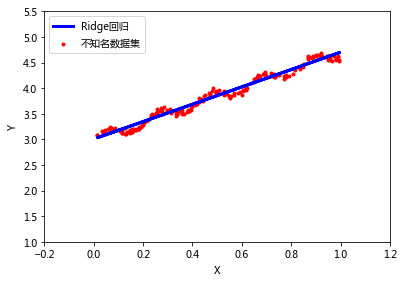

In [103]:
% matplotlib inline
import numpy as np
# 数据初始化
data=np.loadtxt('ex0.txt')
X_DATA=data[:,1]
Y_DATA=data[:,2]
# 数据格式化
X=np.zeros(shape=(X_DATA.shape[0], 2), dtype=np.float) # 考虑偏置项，在测试特征加一维
Y=Y_DATA.reshape(Y_DATA.shape[0], 1)
X[:, 0]=X_DATA
X[:, 1]=1

# 我们全部采用矩阵模式(这样可以使用矩阵更加方便的运算)：  
X=np.matrix(X)
Y=np.matrix(Y)

p_lambda=0.00001   #可以改变p_lambda来看看训练结果

W=(X.T*X+p_lambda * np.eye(X.shape[1])).I*X.T*Y

# 预测效果
predict=X*W

# 可视化
figure=plt.figure('数据集可视化',figsize=(6,4))
ax=figure.add_axes([0.1,0.1,0.8,0.8],xlabel='X',ylabel='Y')
ax.set_xlim(-0.2,1.2)
ax.set_ylim(1,5.5)
ax.scatter(X_DATA,Y_DATA,label='不知名数据集',marker='.',color=(1,0,0,1))

ax.plot(X_DATA,predict,label='Ridge回归',color='b',linewidth=3)

ax.legend()
plt.show()

##### 1.4 Ridge回归的sklearn实现

1. 考虑截距的情况

评估： 0.9731300856492625
斜率： [[1.69522337]]
截距： [3.00779172]


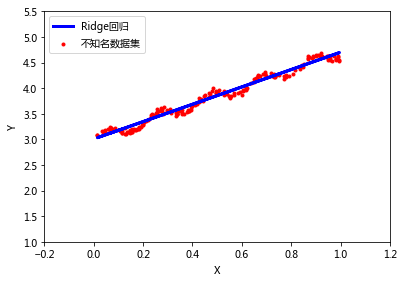

In [155]:
from sklearn.linear_model import Ridge
'''
class sklearn.linear_model.Ridge(
    alpha=1.0, 
    fit_intercept=True, 
    normalize=False, 
    copy_X=True, 
    max_iter=None, 
    tol=0.001, 
    solver=’auto’, 
    random_state=None)
'''

# Ridge回归
regression =Ridge(alpha=0.001,fit_intercept=True)
# 加载数据
data=np.loadtxt('ex0.txt')
X_DATA=data[:,1]
Y_DATA=data[:,2]

X_DATA=X_DATA.reshape(-1,1)
Y_DATA=Y_DATA.reshape(-1,1)

regression.fit(X_DATA,Y_DATA)
print('评估：',regression.score(X_DATA, Y_DATA))
# 斜率
print('斜率：',regression.coef_)
# 截距
print('截距：',regression.intercept_ )

predict=regression.predict(X_DATA)

# 可视化
figure=plt.figure('数据集可视化',figsize=(6,4))
ax=figure.add_axes([0.1,0.1,0.8,0.8],xlabel='X',ylabel='Y')
ax.set_xlim(-0.2,1.2)
ax.set_ylim(1,5.5)
ax.scatter(X_DATA,Y_DATA,label='不知名数据集',marker='.',color=(1,0,0,1))

ax.plot(X_DATA,predict,label='Ridge回归',color='b',linewidth=3)

ax.legend()
plt.show()

比较上面的运算，结果基本上差不多，尽管求解算法我们没有关注。       

2. 不考虑截距的情况

评估： -8.485203616736882
斜率： [[6.23058178]]
截距： 0.0


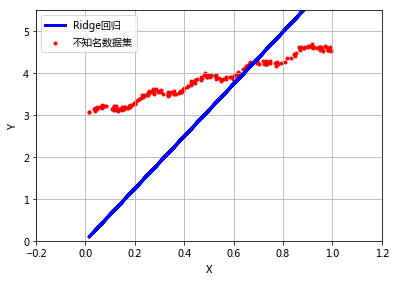

In [159]:
from sklearn.linear_model import Ridge
'''
class sklearn.linear_model.Ridge(
    alpha=1.0, 
    fit_intercept=True, 
    normalize=False, 
    copy_X=True, 
    max_iter=None, 
    tol=0.001, 
    solver=’auto’, 
    random_state=None)
'''

# Ridge回归
regression =Ridge(alpha=0.001,fit_intercept=False)
# 加载数据
data=np.loadtxt('ex0.txt')
X_DATA=data[:,1]
Y_DATA=data[:,2]

X_DATA=X_DATA.reshape(-1,1)
Y_DATA=Y_DATA.reshape(-1,1)

regression.fit(X_DATA,Y_DATA)
print('评估：',regression.score(X_DATA, Y_DATA))
# 斜率
print('斜率：',regression.coef_)
# 截距
print('截距：',regression.intercept_ )

predict=regression.predict(X_DATA)

# 可视化
figure=plt.figure('数据集可视化',figsize=(6,4))
ax=figure.add_axes([0.1,0.1,0.8,0.8],xlabel='X',ylabel='Y')
ax.set_xlim(-0.2,1.2)
ax.set_ylim(0,5.5)
ax.scatter(X_DATA,Y_DATA,label='不知名数据集',marker='.',color=(1,0,0,1))

ax.plot(X_DATA,predict,label='Ridge回归',color='b',linewidth=3)

ax.legend()
plt.grid(True)
plt.show()

##### 1.5. 关于$\lambda$的分析

1. sklearn官方文档中的一个图     
&emsp;&emsp;在sklearn官方文档有一个图说明了随着$\lambda$的变化，每个特征的加权系数的变化（这种变化称为岭迹，绘制的图也称岭迹图）。下面我们使用图示来说明。

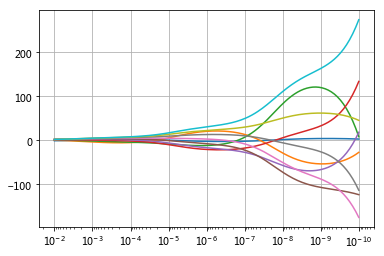

In [3]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import Ridge
'''
numpy.logspace(start, stop, num=50, endpoint=True, base=10.0, dtype=None)
    |-start:  base ** start is the starting value of the sequence.
'''

#  构造了10*10的矩阵
col=np.arange(1,11)
col=np.matrix(col)
row=np.arange(0, 10)
row=np.matrix(row)
row=row.T
x = 1.0/(col+row)

y = np.ones(10)
n_alphas = 200
alphas = np.logspace(-10,-2,n_alphas)
clf = linear_model.Ridge(fit_intercept=False)     #截距为不为0

# 加权系数
coefs = []
for a in alphas:
    clf.set_params(alpha = a)
    clf.fit(x,y)
    coefs.append(clf.coef_)

ax = plt.gca()
ax.plot(alphas,coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])    #坐标轴换一个方向
plt.grid(True)
plt.show()


&emsp;&emsp;上图明显看见有四个特征的加权系数，随着$\lambda$的变化，在逐步趋近于0。

2. 使用4个特征的鸢尾花数据观察$\lambda$的变化产生的影响

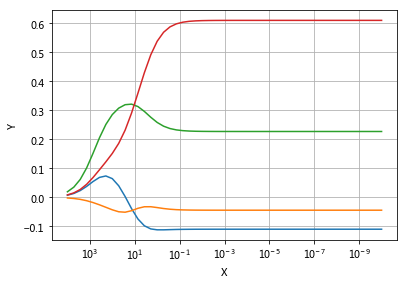

In [3]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import datasets
from sklearn.linear_model import Ridge

#  鸢尾花数据集
data,target=datasets.load_iris(return_X_y=True)
x=data[:]       #改变样本个数，观察效果非常明显
y=target[:]

# lambda变化200次，从10**-2到10**-10
n_alphas = 50
alphas = np.logspace(-10,4,n_alphas)

regression =Ridge(fit_intercept=True)

# 加权系数
coefs = []
for a in alphas:
    regression.set_params(alpha = a)
    regression.fit(x,y)
    coefs.append(regression.coef_)

figure=plt.figure('数据集可视化',figsize=(6,4))
ax=figure.add_axes([0.1,0.1,0.8,0.8],xlabel='X',ylabel='Y')

# plot自动遍历每列，按照不同的颜色绘制曲线
ax.plot(alphas,coefs)
ax.set_xscale('log')    # 不按照等分模式计算x轴刻度，按照对数的指数来计算刻度
ax.set_xlim(ax.get_xlim()[::-1])    #坐标轴换一个方向

# 有网格线，更加容易观察
plt.grid(True)
plt.show()

&emsp;&emsp;上图明显看见有三个特征的加权系数，随着$\lambda$的变化，在逐步趋近于0。当样本数目在50个的时候，基本上对特征的加权系数没有影响；如果把样本数量改成5个，明显，有三个特征的加权系数趋于0，从而在决策的时候，这三个特征的影响基本上就消失。        
&emsp;&emsp;所以$\lambda$的作用不仅仅是解决奇异的问题，还可以根据样本的数量域特征的数量，影响到决策的特征数量的多少。      

##### 1.6 Ridge回归中数据集标准化的必要性     
&emsp;&emsp;从上面可以看得出来，在Ridge回归中，如果样本数偏少，某些特征在决策中基本上没有作用，为了防止某些重要特征最后参与不了决策，所以需要对数据集进行标准化。标准化的目的是所有数据站在统一起跑线上，这样避免某些重要特征因为数据本身偏小，在训练中容易被丢弃。   

&emsp;&emsp;数据集标准化也称中心化，就是将数据的均值调整到0，标准差调整为1；计算过程很简单就是将所有数据减去平均值后再除以标准差。

&emsp;&emsp;数据标准化公式：    
&emsp;&emsp;&emsp;&emsp;|-$x_i^\prime = \dfrac{x_i -\mu}{\sigma}$

&emsp;&emsp;标准化数据集的均值为0：    
&emsp;&emsp;&emsp;&emsp;|-$E=\dfrac{1}{n} \sum \limits _{i=1}^n x_i ^ \prime = \dfrac{\dfrac{1}{n} \sum \limits _{i=1}^{n} (x_i - \mu)}{\sigma} = \dfrac{(\dfrac{1}{n} \sum \limits _{i=1}^{n} x_i) - \mu}{\sigma} = 0$      
&emsp;&emsp;标准化数据集的方差为1：   
&emsp;&emsp;&emsp;&emsp;|-$\sigma ^2 = \dfrac{1}{n} \sum \limits _{i=1} ^ n (x_i^ \prime - \mu)^2 = \dfrac{1}{n} \sum \limits _{i=1} ^ n (x_i^ \prime)^2 = \dfrac{1}{n} \sum \limits _{i=1} ^ n (\dfrac{x_i - \mu}{\sigma})^2= \dfrac{ \dfrac{1}{n} \sum \limits _{i=1}^{n} (x_i- \mu )^2}{\sigma ^ 2} =\dfrac{\sigma^2}{\sigma^2}=1$ 

1. 计算均值，标准方差与数据标准化 

In [200]:
import numpy as np
from sklearn import preprocessing
m=np.array(
    [
        [ 1,2,3,4],
        [ 0,4,3,2],
        [ 3,1,9,7]
    ],dtype=np.float64
)
pre_data_sk=preprocessing.scale(m)
print ("\n使用sklearn标准化结果：\n",pre_data_sk)
# 标准化
c_mean=m.mean(axis=0)
c_std=m.std(axis=0)
pre_data_mn=(m-c_mean)/c_std

print("\n使用numpy标准化结果：\n",pre_data_mn)

print('\n比较结果：')
print(pre_data_sk==pre_data_mn)


使用sklearn标准化结果：
 [[-0.26726124 -0.26726124 -0.70710678 -0.16222142]
 [-1.06904497  1.33630621 -0.70710678 -1.13554995]
 [ 1.33630621 -1.06904497  1.41421356  1.29777137]]

使用numpy标准化结果：
 [[-0.26726124 -0.26726124 -0.70710678 -0.16222142]
 [-1.06904497  1.33630621 -0.70710678 -1.13554995]
 [ 1.33630621 -1.06904497  1.41421356  1.29777137]]

比较结果：
[[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]


2. 数据集标准化实现代码        
&emsp;&emsp;数据标准化包含输入与输出；    

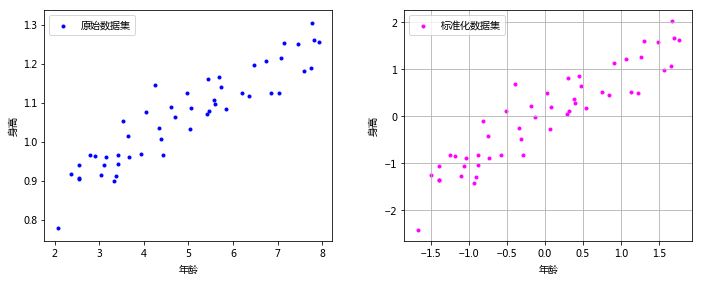

In [210]:
% matplotlib inline
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np

X_DATA = np.loadtxt('ex2x.dat')
Y_DATA = np.loadtxt('ex2y.dat')
# 可视化
figure=plt.figure('数据集可视化',figsize=(10,4))
# 数据集标准化前
ax1=figure.add_axes([0.1,0.1,0.4,0.8],xlabel='年龄',ylabel='身高')

ax1.scatter(X_DATA,Y_DATA,label='原始数据集',marker='.',color=(0,0,1,1))
ax1.legend()

# 数据标准化-------------

STD_X=preprocessing.scale(X_DATA)
STD_Y=preprocessing.scale(Y_DATA)
# 数据集标准化后
ax2=figure.add_axes([0.6,0.1,0.4,0.8],xlabel='年龄',ylabel='身高')
ax2.scatter(STD_X,STD_Y,label='标准化数据集',marker='.',color=(1,0,1,1))
ax2.legend()
plt.grid(True)
plt.show()

标准化数据集以后，均值为0

3. 标准化数据集训练      

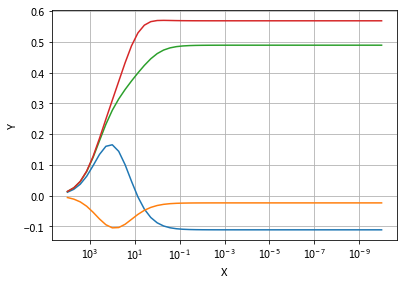

In [2]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import datasets
from sklearn import preprocessing

#  鸢尾花数据集
data,target=datasets.load_iris(return_X_y=True)
x=data[:]       #改变样本个数，观察效果非常明显
y=target[:] 

x=x.astype(np.float64)
y=y.astype(np.float64)

x=preprocessing.scale(x)
y=preprocessing.scale(y)

# lambda变化200次，从10**-2到10**-10
n_alphas = 50
alphas = np.logspace(-10,4,n_alphas)

regression =linear_model.Ridge(fit_intercept=True)

# 加权系数
coefs = []
for a in alphas:
    regression.set_params(alpha = a)
    regression.fit(x,y)
    coefs.append(regression.coef_)

figure=plt.figure('数据集可视化',figsize=(6,4))
ax=figure.add_axes([0.1,0.1,0.8,0.8],xlabel='X',ylabel='Y')

# plot自动遍历每列，按照不同的颜色绘制曲线
ax.plot(alphas,coefs)
ax.set_xscale('log')    # 不按照等分模式计算x轴刻度，按照对数的指数来计算刻度
ax.set_xlim(ax.get_xlim()[::-1])    #坐标轴换一个方向

# 有网格线，更加容易观察
plt.grid(True)
plt.show()

&emsp;&emsp;标准化的数据集，在回归上，特征会尽量参与决策，但权重系数明显反应了特征的决策贡献。     
&emsp;&emsp;如果要确定哪个$\lambda$是最合适的，需要做交叉验证，得到较好的模型。    

4. 交叉验证

&emsp;&emsp;交叉验证（Cross Validation），有的时候也称作循环估计（Rotation Estimation），是一种统计学上将数据样本切割成较小子集的实用方法，该理论是由Seymour Geisser提出的。    
&emsp;&emsp;在给定的建模样本中，拿出大部分样本进行建模型，留小部分样本用刚建立的模型进行预报，并求这小部分样本的预报误差，记录它们的平方加和。这个过程一直进行，直到所有的样本都被预报了一次而且仅被预报一次。把每个样本的预报误差平方加和，称为PRESS(predicted Error Sum of Squares)。

##### 1.7 Ridge的数学基础    

&emsp;&emsp;添加一个$\lambda I$项，需要有一定的数学理论与机器学习理论支持。     
&emsp;&emsp;Ridge回归的求解中增加这一项，我们可以从机器学习的角度返回损失函数的定义，甚至可以返回到决策模型以及损失模型的建模上。      

&emsp;&emsp;Ridge回归的损失函数模型是：     
&emsp;&emsp;&emsp;&emsp;|-$J(W)=\dfrac{1}{2}( \sum \limits _{i=1}^{n} (y_i - x_iW)^2 + \lambda \sum \limits _{i=1}^{k} {w_i}^2 )$     
&emsp;&emsp;&emsp;&emsp;其中$w_i$是$W$的每个元素。

&emsp;&emsp;如果返回到损失模型的建立（就是从误差的概率模型，到最大似然函数的推导），我们可以看得出实际是概率的加权平衡：      
&emsp;&emsp;对似然函数求对数：   
&emsp;&emsp;&emsp;&emsp;$l(W)=logL(W)$     
&emsp;&emsp;&emsp;&emsp;$l(W)=log\prod\limits_{i=1}^{m}{\dfrac{1}{\sqrt{2\pi}\sigma}exp(-\dfrac{(y^{(i)}-x^{(i)}W)^2}{2\sigma^2})}$          
&emsp;&emsp;&emsp;&emsp;$l(W)=\sum\limits_{i=1}^{m}log{\dfrac{1}{\sqrt{2\pi}\sigma}exp(-\dfrac{(y^{(i)}-x^{(i)}W)^2}{2\sigma^2})}$      
&emsp;&emsp;&emsp;&emsp;$l(W)=m\ log\ \dfrac{1}{\sqrt{2\pi}\sigma}-\dfrac{1}{\sigma^2}\ \dfrac{1}{2}\sum\limits_{i=1}^{m}(y^{(i)}-x^{(i)}W)^2$    

&emsp;&emsp;大家可以从早器的最大似然函数建模可以看得出来，实际是对概率做的平衡（就是先验概率与后验概率）。     

1.  线性回归的概率模型（Bayes概率模型）    

&emsp;&emsp;假设线性分布的决策模型是：     
&emsp;&emsp;&emsp;&emsp;|-$y=xW$       
&emsp;&emsp;假设线性分布的误差模型是：     
&emsp;&emsp;&emsp;&emsp;|-$y=xW + \epsilon$     

 &emsp;&emsp;用数学术语的描述就是：     
 &emsp;&emsp; &emsp;&emsp;|-$\epsilon \ \sim \  N(0, \sigma ^ 2)$，则$y_i \ \sim  \  N(x_iW,\sigma ^2)$     
  &emsp;&emsp;从而得到上述最大似然估计函数。   

2.  Ridge回归的概率模型（Bayes概率模型）   
&emsp;&emsp;假设线性分布的决策模型是：     
&emsp;&emsp;&emsp;&emsp;|-$y=xW$       
&emsp;&emsp;假设线性分布的误差模型是：     
&emsp;&emsp;&emsp;&emsp;|-$y=xW + \epsilon$     
&emsp;&emsp;使用数学术语描述为：    
&emsp;&emsp; &emsp;&emsp;|-$\epsilon \ \sim \  N(0, \sigma ^ 2)$，且$w_i \  \sim \  N(0, \tau ^2)$     
&emsp;&emsp; &emsp;&emsp;|     
&emsp;&emsp; &emsp;&emsp;|-注意这里使用了误差的先验概率模型，其中权重系数使用后验概率模型（也称高斯选样模型）。       

&emsp;&emsp;下面可以使用简单的概率推导一下：   
&emsp;&emsp;&emsp;&emsp;|-$P(y_i|w_i)=P(w_i|y_i)P(y_i)$     
&emsp;&emsp;&emsp;&emsp;|-$P(y_i|w_i)=N(0,\tau ^2) N(0,\sigma ^2 )$      

&emsp;&emsp;下面可以根据上述概率得到极大似然函数：   
&emsp;&emsp;&emsp;&emsp;$l(W)=logL(W)$     
&emsp;&emsp;&emsp;&emsp;$l(W)=log\prod\limits_{j=1}^{k}{\dfrac{1}{\sqrt{2\pi}\tau}exp(-\dfrac{(w_j)^2}{2\tau ^2})}   \prod\limits_{i=1}^{m}{\dfrac{1}{\sqrt{2\pi}\sigma}exp(-\dfrac{(y^{(i)}-x^{(i)}W)^2}{2\sigma^2})}$              
&emsp;&emsp;&emsp;&emsp;$l(W)= k\ log\ \dfrac{1}{\sqrt{2\pi}\tau}-\dfrac{1}{\tau^2}\ \dfrac{1}{2}\sum\limits_{j=1}^{k}(w_j)^2  \ + \   m\ log\ \dfrac{1}{\sqrt{2\pi}\sigma}-\dfrac{1}{\sigma^2}\ \dfrac{1}{2}\sum\limits_{i=1}^{m}(y^{(i)}-x^{(i)}W)^2$    

&emsp;&emsp;不考虑两个常数项，并且记:$\lambda=\dfrac{1} {\tau ^2}$，我们可以取损失函数为：    
&emsp;&emsp;&emsp;&emsp;|-$J(W)=\dfrac{1}{2}( \sum \limits _{i=1}^{n} (y_i - x_iW)^2 + \lambda \sum \limits _{i=1}^{k} {w_i}^2 )$     

&emsp;&emsp;现在我们看，为什么$\lambda$越大，则权重系数就会都趋于0，因为权重系数服从正态分布，$\lambda$越大，就是正态分布的方差越小，从而权重系数都趋于均值0。      

# 注意： 根据上述推理，$\lambda$肯定必须大于0，他实际代表的是方差的倒数。

3. Ridge损失函数的其他几何解释     
&emsp;&emsp;目前还存在Ridge回归损失函数的其他解释，但这些解释都是基于直观的解释，没有严密的数学推理作为保证，我本人觉得是不具备说服力的，这里不详细介绍。       

4. 过拟合问题的解决    
&emsp;&emsp;因为Ridge回归，可以解决特征过多的问题，从而可以解决因为特征过多导致的过拟合问题。      

### 2. LASSO回归      
&emsp;&emsp;LASSO是由1996年Robert Tibshirani首次提出，全称Least absolute shrinkage and selection operator（最小绝对收缩和选择算子）。该方法是一种压缩估计。

##### 2.1 LASSO回归模型    

1. 决策模型

&emsp;&emsp;|-$y=xW$

2. 损失函数模型  

&emsp;&emsp;|-$J(W)=\dfrac{1}{2}( \sum \limits _{i=1}^{n} (y_i - x_iW)^2 + \lambda \sum \limits _{i=1}^{k} {|w_i|} )$     

3. Bayes建模模型  

&emsp;&emsp;误差模型：    
&emsp;&emsp;&emsp;&emsp;|-$y=xW + \epsilon $        
&emsp;&emsp;&emsp;&emsp;|-$\epsilon  \sim N(0, \sigma ^ 2)  $分布，且$w_i \sim Laplace(0,b)$分布。   
&emsp;&emsp;&emsp;&emsp;     
&emsp;&emsp;&emsp;&emsp;|-$f(x)=\dfrac{1}{2 b} exp{ (- \dfrac{|x-\mu|}{ b } )}$   

&emsp;&emsp;最大似然函数模型：      
&emsp;&emsp;&emsp;&emsp;$l(W)=log\prod\limits_{j=1}^{k}{\dfrac{1}{2b}exp(-\dfrac{|w_j|}{b})}   \prod\limits_{i=1}^{m}{\dfrac{1}{\sqrt{2\pi}\sigma}exp(-\dfrac{(y^{(i)}-x^{(i)}W)^2}{2\sigma^2})}$                    
             
&emsp;&emsp;&emsp;&emsp;$l(W)= k\ log\ \dfrac{1}{2 b}-\dfrac{1}{b}\ \dfrac{1}{2}\sum\limits_{j=1}^{k}|w_j|  \ + \   m\ log\ \dfrac{1}{\sqrt{2\pi}\sigma}-\dfrac{1}{\sigma^2}\ \dfrac{1}{2}\sum\limits_{i=1}^{m}(y^{(i)}-x^{(i)}W)^2$    
&emsp;&emsp;&emsp;&emsp;     
&emsp;&emsp;&emsp;&emsp;$l(W)=-\dfrac{1}{\sigma^2}\ \dfrac{1}{2}\sum\limits_{i=1}^{m}(y^{(i)}-x^{(i)}W)^2 -\dfrac{1}{b}\ \dfrac{1}{2}\sum\limits_{j=1}^{k}|w_j|  + k\ log\ \dfrac{1}{2 b} + m\ log\ \dfrac{1}{\sqrt{2\pi}\sigma}$    
&emsp;&emsp;&emsp;&emsp;$l(W)=-\dfrac{1}{\sigma^2}\ (\dfrac{1}{2}\sum\limits_{i=1}^{m}(y^{(i)}-x^{(i)}W)^2 +\dfrac{\sigma ^ 2}{b}\ \dfrac{1}{2}\sum\limits_{j=1}^{k}|w_j| ) + k\ log\ \dfrac{1}{2 b} + m\ log\ \dfrac{1}{\sqrt{2\pi}\sigma}$    

&emsp;&emsp;如果记：$\lambda=\dfrac{\sigma ^ 2}{b}$   ,则可以取损失函数为：    
&emsp;&emsp;&emsp;&emsp;|-$J(W)=\dfrac{1}{2}( \sum \limits _{i=1}^{n} (y_i - x_iW)^2 + \lambda \sum \limits _{i=1}^{k} {|w_i|} )$     

4. LASSO与Ridge回归的关系 

&emsp;&emsp;实际上Ridge回归与LASSO回归都是采用了后验建模，Ridge回归的权重系数服从正态分布，LASSO回归权重系数服从Laplace分布。      
&emsp;&emsp;Ridge回归中的$\lambda$实际上是正态分布方差的倒数$\lambda=\dfrac{1}{\sigma ^2}$，在RASSO分布中的$\lambda$实际上由误差的正态分布方差与Laplace的方差共同决定$\lambda=\dfrac{\sigma^ 2}{b}$，如果$\sigma=1$取标准正态的方差1，则$\lambda=\dfrac{1}{b}$

5. 正态分布函数的方差变化        
&emsp;&emsp;$f(x)=\dfrac{ 1 }{\sqrt{2 \pi } \sigma} exp ( - \dfrac{ ( x - \mu ) ^ 2 }{ 2 \sigma ^ 2 } )$

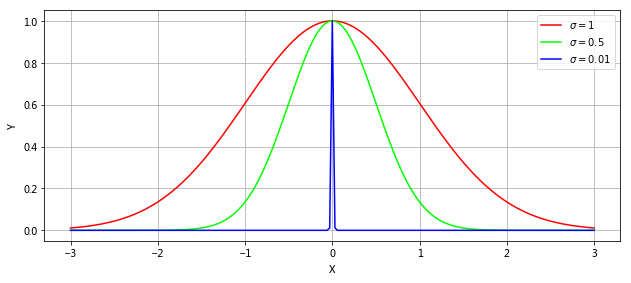

In [41]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# u=0
n=lambda x,s:(np.exp(-x**2/(2.0*s**2)))

x=np.linspace(-3,3,201,dtype=np.float64)

sigma=1
y_1=n( x, sigma )

sigma=0.5
y_2=n( x, sigma )

sigma=0.01
y_3=n( x, sigma )

# 可视化
figure=plt.figure('正态函数',figsize=(10,4))
ax=figure.add_axes([0.1,0.1,0.8,0.8],xlabel='X',ylabel='Y')
ax.plot(x,y_1,color= ( 1, 0, 0, 1 ),label='$\sigma=1$')
ax.plot(x,y_2,color= ( 0, 1, 0, 1 ), label='$\sigma=0.5$')
ax.plot(x,y_3,color= ( 0, 0, 1, 1 ), label='$\sigma=0.01$')
plt.legend()
plt.grid(True)
plt.show()

6. Laplace分布函数的方差变化        
&emsp;&emsp;$f(x)= \dfrac{1}{2 \lambda } exp (- \dfrac{ | x- \mu | }{ \lambda } ) $

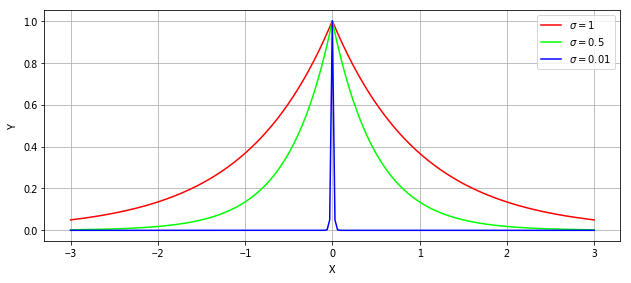

In [45]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# u=0
n=lambda x,s:np.exp(-np.abs(x)/s)

x=np.linspace(-3,3,201,dtype=np.float64)

sigma=1
y_1=n( x, sigma )

sigma=0.5
y_2=n( x, sigma )

sigma=0.01
y_3=n( x, sigma )

# 可视化
figure=plt.figure('正态函数',figsize=(10,4))
ax=figure.add_axes([0.1,0.1,0.8,0.8],xlabel='X',ylabel='Y')
ax.plot(x,y_1,color= ( 1, 0, 0, 1 ),label='$\sigma=1$')
ax.plot(x,y_2,color= ( 0, 1, 0, 1 ), label='$\sigma=0.5$')
ax.plot(x,y_3,color= ( 0, 0, 1, 1 ), label='$\sigma=0.01$')
plt.legend()
plt.grid(True)
plt.show()

7. 正态分布函数与Laplace分布函数的比较      

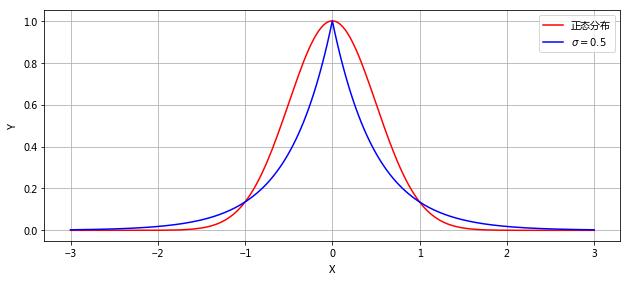

In [50]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# u=0
n=lambda x,s:(np.exp(-x**2/(2.0*s**2)))
l=lambda x,s:np.exp(-np.abs(x)/s)

x=np.linspace(-3,3,201,dtype=np.float64)

sigma=0.5
y_1=n( x, sigma )
y_2=l( x, sigma)

# 可视化
figure=plt.figure('正态函数',figsize=(10,4))
ax=figure.add_axes([0.1,0.1,0.8,0.8],xlabel='X',ylabel='Y')
ax.plot(x,y_1,color= ( 1, 0, 0, 1 ),label='正态分布')
ax.plot(x,y_2,color= ( 0, 0, 1, 1 ), label='$\sigma=0.5$')

plt.legend()
plt.grid(True)
plt.show()

&emsp;&emsp;可以看得出来，拉普拉斯分布，在相同的参数下，取值为0更加不容易。    

##### 2.2 LASSO实现

1. sklearn实现

评估： 0.9730836494329972
斜率： [1.68361119]
截距： [3.01346217]


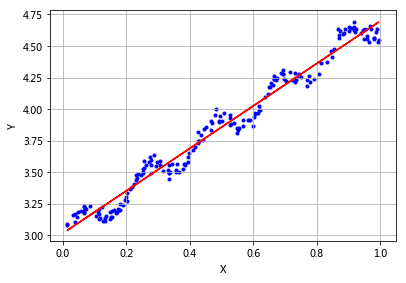

In [2]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import datasets
from sklearn import preprocessing

#  数据集
data=np.loadtxt('ex0.txt')
X_DATA=data[:,1]
Y_DATA=data[:,2]
# 数据格式化
X_DATA=X_DATA.reshape(X_DATA.shape[0],1)
Y_DATA=Y_DATA.reshape(X_DATA.shape[0],1)


#x=preprocessing.scale(x)
#y=preprocessing.scale(y)

alpha=0.001
regression =linear_model.Lasso(alpha=alpha, fit_intercept=True)

regression.fit(X_DATA,Y_DATA)

pre=regression.predict(X_DATA)

pre=pre.reshape(pre.shape[0],1)
#cor=np.corrcoef(Y_DATA.T,pre.T)
#print('相关性：',cor)
# 测试
print('评估：',regression.score(X_DATA, Y_DATA))
# 斜率
print('斜率：',regression.coef_)
# 截距
print('截距：',regression.intercept_ )

figure=plt.figure('数据集可视化',figsize=(6,4))
ax=figure.add_axes([0.1,0.1,0.8,0.8],xlabel='X',ylabel='Y')

ax.scatter(X_DATA,Y_DATA,color=(0,0,1,1),marker='.')

ax.plot(X_DATA,pre,color=(1,0,0,1))

# 有网格线，更加容易观察
plt.grid(True)
plt.show()

2. numpy实现    
&emsp;&emsp;由于LASSO回归模型的损失函数，无法使用最小二乘法求解，也无法使用梯度下降，一般需要使用二次规划算法。    
&emsp;&emsp;二次规划算法（Lagrange法）这里留存，下次实现。   
&emsp;&emsp;向前逐步回归。

In [ ]:
# 保留

3. Tensorflow实现

### 3. Ridge回归与LASSO回归的比较

[1.00000000e-10 1.93069773e-10 3.72759372e-10 7.19685673e-10
 1.38949549e-09 2.68269580e-09 5.17947468e-09 1.00000000e-08
 1.93069773e-08 3.72759372e-08 7.19685673e-08 1.38949549e-07
 2.68269580e-07 5.17947468e-07 1.00000000e-06 1.93069773e-06
 3.72759372e-06 7.19685673e-06 1.38949549e-05 2.68269580e-05
 5.17947468e-05 1.00000000e-04 1.93069773e-04 3.72759372e-04
 7.19685673e-04 1.38949549e-03 2.68269580e-03 5.17947468e-03
 1.00000000e-02 1.93069773e-02 3.72759372e-02 7.19685673e-02
 1.38949549e-01 2.68269580e-01 5.17947468e-01 1.00000000e+00
 1.93069773e+00 3.72759372e+00 7.19685673e+00 1.38949549e+01
 2.68269580e+01 5.17947468e+01 1.00000000e+02 1.93069773e+02
 3.72759372e+02 7.19685673e+02 1.38949549e+03 2.68269580e+03
 5.17947468e+03 1.00000000e+04]


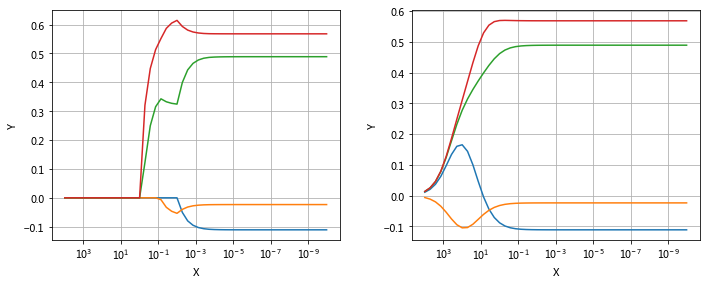

In [2]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import datasets
from sklearn import preprocessing

#  鸢尾花数据集
data,target=datasets.load_iris(return_X_y=True)
x=data[:]       #改变样本个数，观察效果非常明显
y=target[:] 

x=x.astype(np.float64)
y=y.astype(np.float64)

x=preprocessing.scale(x)
y=preprocessing.scale(y)

# lambda变化200次，从10**-2到10**-10
n_alphas = 50
alphas = np.logspace(-10,4,n_alphas)
print(alphas)

lasso =linear_model.Lasso(fit_intercept=True)

# 加权系数
coefs_lasso = []
for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(x,y)
    coefs_lasso.append(lasso.coef_)
    
#------------------------------------
ridge =linear_model.Ridge(fit_intercept=True)

# 加权系数
coefs_ridge = []
for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(x,y)
    coefs_ridge.append(ridge.coef_)
    

figure=plt.figure('数据集可视化',figsize=(10,4))
ax_lasso=figure.add_axes([0.1,0.1,0.4,0.8],xlabel='X',ylabel='Y')
# plot自动遍历每列，按照不同的颜色绘制曲线
ax_lasso.plot(alphas,coefs_lasso)
ax_lasso.set_xscale('log')    # 不按照等分模式计算x轴刻度，按照对数的指数来计算刻度
ax_lasso.set_xlim(ax_lasso.get_xlim()[::-1])    #坐标轴换一个方向
ax_lasso.grid(True)

ax_ridge=figure.add_axes([0.6,0.1,0.4,0.8],xlabel='X',ylabel='Y')
# plot自动遍历每列，按照不同的颜色绘制曲线
ax_ridge.plot(alphas,coefs_ridge)
ax_ridge.set_xscale('log')    # 不按照等分模式计算x轴刻度，按照对数的指数来计算刻度
ax_ridge.set_xlim(ax_ridge.get_xlim()[::-1])    #坐标轴换一个方向



# 有网格线，更加容易观察
plt.grid(True)
plt.show()

# 四、回归的多类分类

### 1.  One对All多分类

-